PARTE 1: Regresión logística

1. Bibliotecas necesarias para la práctica

In [8]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as opt

2. Extraemos los datos del csv. X contiene las dos primeras columnas e Y contiene la última columna

In [9]:
from pandas.io.parsers import read_csv
valores = read_csv('C:/Users/carli_000/Desktop/ex2data1.csv', header= None)
X = valores.iloc[:,:-1]
Y = valores.iloc[:,2]

#print(X, Y)

3. Visualización de los datos:
    

X es la nota del primer examen e Y es la nota del segundo examen. 
Dibujamos + para las notas que son positivas. 
Dibujamos puntos amarillos para las notas que son negativas.

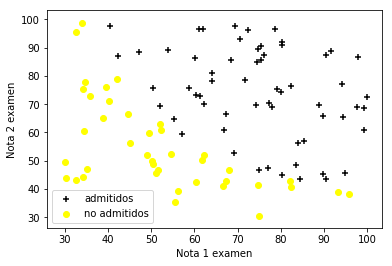

In [137]:
def graficaEjemplo1():
#Obtiene un vector con los índices de los ejemplos positivos
    positivos = Y == 1
    negativos = Y == 0
# Dibuja los ejemplos positivos
    plt.scatter(X[positivos][0], X[positivos][1], marker='+' , c='k')
    plt.scatter(X[negativos][0], X[negativos][1],marker ='o', c='yellow')
    plt.legend(('admitidos', 'no admitidos'))
    plt.xlabel('Nota 1 examen')
    plt.ylabel('Nota 2 examen')
    
   
graficaEjemplo1()

4. Función sigmoide

In [138]:
#Funcion sigmoide
def h(z):
    return 1/(1 + np.exp(-z))

Añadimos una columna de 1's a X

In [139]:
[m,n]=X.shape
ones = np.ones((m,1))
X_aux = np.hstack((ones, X))

5. Cálculo de la función de coste

Para comprobar que para theta inicializada a 0 da el valor correcto. Realizamos la función de coste vectorizada según la formula.
    

In [140]:
#funcion de coste vectorizada

def funCoste(theta , X, Y):
    coste = (-1) * (np.matmul(np.transpose(np.log(h(X@theta))), Y) + 
                   np.matmul(np.transpose(np.log(1 - h(X@theta))), (1-Y)))/m
    
    return coste       
funCoste(np.zeros((3,1)), X_aux, Y)


array([0.69314718])

In [141]:
Y_aux = Y[:, np.newaxis]

6. Realización del gradiente vectorizado.

In [142]:
#gradiente vectorizado

def gradiente(theta, X, Y):
   # print(np.subtract(h(X@theta),Y))
    return ((1/m) * np.transpose(X) @ (h(X @ theta) - Y))
gradiente(np.zeros((3,1)), X_aux, Y_aux)



array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

7. Cálculo del valor óptimo de los parámetros

In [143]:
#Calculo del valor optimo de los parámetros
result = opt.fmin_tnc(func= funCoste, x0=np.zeros((3,1)).flatten(), fprime=gradiente, args =(X_aux, Y_aux.flatten()))
theta_opt = result[0]
#funcion de coste con theta optimizado
costeThetaOp = funCoste(theta_opt, X_aux, Y_aux)
print(costeThetaOp)


[0.2034977]


8. Pintamos la frontera de decision con los valores de theta optimizados

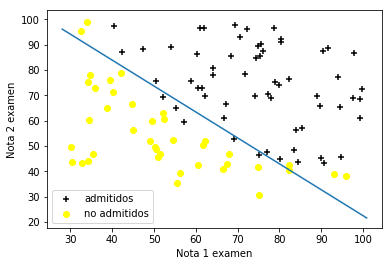

In [144]:
graficaEjemplo1()
valores_x = [np.min(X_aux [:, 1] -2), np.max(X_aux[:, 2] +2)]
valores_y = -1 / theta_opt[-1] * (theta_opt[0] + np.dot(theta_opt[1], valores_x))
linea_decision = plt.plot(valores_x, valores_y)

plt.show()

9.Calculo del porcentaje ejemplos de entrenamiento que se clasifican correctamente utilizando los valores de theta

In [145]:
#Evaluacion de la regresion logistica
def porcentaje(X_aux, Y_aux,theta):
    correcto = 0
    for i in range(0,m):
        s = h(np.dot(X_aux[i],theta))
        if(s>=0.5):
            s=1
        else:
            s=0
        if(Y_aux[i] == s):
            correcto = correcto + 1
    porcentaje = (correcto/m) * 100
    return porcentaje
p = porcentaje(X_aux, Y_aux, theta_opt)
print(p)

89.0


PARTE 2: Regresión logística regularizada

 1. Importamos las bibliotecas necesarias

In [140]:
from pandas.io.parsers import read_csv
valores = read_csv('C:/Users/carli_000/Desktop/ex2data2.csv', header= None)
X2 = valores.iloc[:,:-1]
Y2 = valores.iloc[:,2]

2. Representamos la gráfica en el que el eje x es el resultado del test del microchip 1 y el eje y es el resultado del test del microchip 2 en función de y (si el funciona o no el microchip)

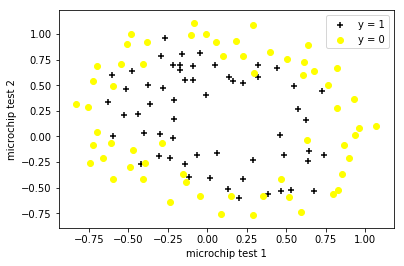

In [141]:
def graficaEjemplo2():
#Obtiene un vector con los índices de los ejemplos positivos
    positivos = Y2 == 1
    negativos = Y2 == 0
# Dibuja los ejemplos positivos
    plt.scatter(X2[positivos][0], X2[positivos][1], marker='+' , c='k')
    plt.scatter(X2[negativos][0], X2[negativos][1], marker ='o', c='yellow')
    plt.legend(('y = 1', 'y = 0'))
    plt.xlabel('microchip test 1')
    plt.ylabel('microchip test 2')
    
   
graficaEjemplo2()

3. Importamos las bibliotecas necesarias

In [142]:
import sklearn.preprocessing as Pol

4. Mapeo de los atributos: utilizamos polynomialFeatures para extender cada ejemplo de entrenamiento con los términos polinómicos de x1 y x2 hasta la sexta potencia, completando así un total de 28 atributos para cada ejemplo.

In [143]:
#def mapFeature:
def mapFeature():
    poly = Pol.PolynomialFeatures(6)
    return poly.fit_transform(X2)
mapFeature()

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

5. Función sigmoide

In [144]:
#Funcion sigmoide
def h(z):
    return 1/(1 + np.exp(-z))

6. Función de coste

In [145]:
[m,n]=X2.shape

7. Calculo de la función de coste según la fórmula. Para comprobar que es correcto probamos con theta todo a 0 y landa 1. Se obtiene 0.69314718

In [155]:
def funCost(theta, X, Y, landa):
    return -(np.matmul(np.transpose(np.log(h(X@theta))), Y) +
            (np.matmul(np.transpose(np.log(1-h(X@theta))), (1 - Y)))+
             (landa/(2*m)) * (sum(theta**2)))/m
funCost(np.zeros((n,1)),X2,Y2,1)
             

array([0.69314718])

8. Cálculo del gradiente

In [17]:
Y2_aux = Y2[:, np.newaxis]

In [38]:

def gradiente2(theta,X,Y,landa):
    return (((np.transpose(X))@(h(X@theta) - Y)) + ((landa/m)*theta))/m
gradiente2(np.zeros((28,1)), mapFeature(), Y2_aux, 1)

array([[8.47457627e-03],
       [1.87880932e-02],
       [7.77711864e-05],
       [5.03446395e-02],
       [1.15013308e-02],
       [3.76648474e-02],
       [1.83559872e-02],
       [7.32393391e-03],
       [8.19244468e-03],
       [2.34764889e-02],
       [3.93486234e-02],
       [2.23923907e-03],
       [1.28600503e-02],
       [3.09593720e-03],
       [3.93028171e-02],
       [1.99707467e-02],
       [4.32983232e-03],
       [3.38643902e-03],
       [5.83822078e-03],
       [4.47629067e-03],
       [3.10079849e-02],
       [3.10312442e-02],
       [1.09740238e-03],
       [6.31570797e-03],
       [4.08503006e-04],
       [7.26504316e-03],
       [1.37646175e-03],
       [3.87936363e-02]])

9. Cálculo del valor óptimo de los parámetros

In [158]:
def valorOptimo():
    output = opt.fmin_tnc(func = funCost, x0 = np.zeros((28,1)).flatten(), fprime = gradiente2,  args = (mapFeature(), Y2_aux.flatten(), 1))
    theta = output[0]
    print(theta)
    
valorOptimo()

[ 3.77377444  1.99417441  4.69597945 -5.44022689 -6.87638526 -5.89909717
  2.2590138   0.08940053  2.75128489 -2.7056456  -3.76442566  3.18093579
 -3.95743691 -1.91232391 -6.67407337 -1.85331642 -0.98793687  5.58587702
 -3.91736575 -4.84178202  3.19074231 -5.8564317   0.29735646 -0.87774435
  3.61191529 -5.03648702 -3.9206938   0.29653692]


9. Pintamos la frontera de regresión.

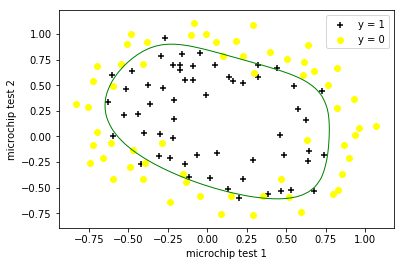

In [157]:

graficaEjemplo2()
poly = Pol.PolynomialFeatures(6)
def plot_decisionboundary(X, Y, theta, poly):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    h1 = h(poly.fit_transform(np.c_[xx1.ravel(),xx2.ravel()]).dot(theta))
    h1 = h1.reshape(xx1.shape)
    plt.contour(xx1, xx2, h1, [0.5], linewidths=1, colors='g')
    
plot_decisionboundary(np.matrix(X2), Y2, theta, poly)


Alumnos: Carla Paola Peñarrieta Uribe y Hao Hao He